In [1]:
import pandas as pd
import spacy as sp
from collections import Counter
import matplotlib.pyplot as plt

Importing dataset and loading NLP object.

In [2]:
df = pd.read_excel('dataset.xlsx')
nlp = sp.load('en_core_web_sm')

Building the corpus.

In [3]:
corpus = []

for text in df['Abstract']:
    if type(text) == str:
        corpus.append(nlp(text))

Removing stop words and punctuation, storing lemmas.

In [4]:
processed_corpus = []

for text in corpus:
    processed_text = []
    for token in text:
        if (not token.is_punct) and (not token.is_stop):
            processed_text.append(token.lemma_)
    processed_corpus.append(processed_text)

Counting lemma frequencies.

In [5]:
concat_corpus = []

for text in processed_corpus:
    concat_corpus += text

freq = Counter(concat_corpus).most_common(25)

Plotting the 25 most frequent words.

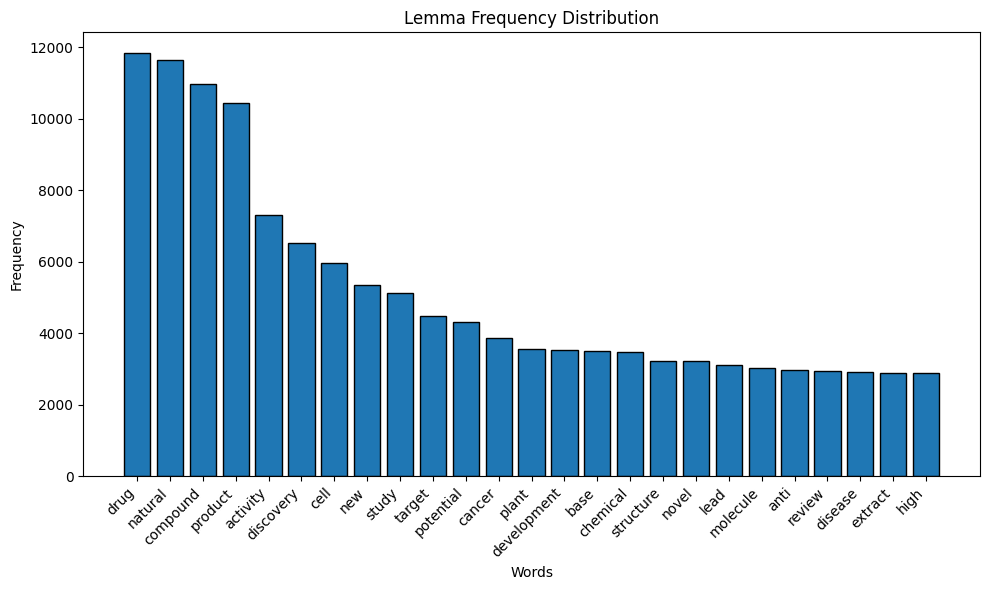

In [6]:
words, freqs = zip(*freq)

plt.figure(figsize=(10, 6))  
plt.bar(words, freqs, edgecolor='k')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Lemma Frequency Distribution')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Publication Location

Extracting publication location.

In [7]:
countries = []

for country in df['Publisher Address']:
    if type(country) == str:
        countries.append(country.split(', ')[-1])

Filtering.

In [8]:
for i in range(len(countries)):
    if countries[i] == 'UNITED STATES':
        countries[i] = 'USA'
    if ('USA' in countries[i]) and (countries[i] != 'USA'):
        countries[i] = 'USA'
    if countries[i] == 'U ARAB EMIRATES':
        countries[i] = 'UAE'
    if ('CHINA' in countries[i]) and (countries[i] != 'CHINA'):
        countries[i] = 'CHINA'  
    if ('HONG KONG' in countries[i]):
        countries[i] = 'CHINA'
    if ('ENGLAND' in countries[i]) and (countries[i] != 'ENGLAND'):
        countries[i] = 'ENGLAND'  
    if len({'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}.intersection(countries[i])) != 0:
        countries[i] = ''

freq_countries = Counter(countries).most_common(10)

for item in freq_countries:
    if item[0] == '':
        del freq_countries[freq_countries.index(item)]

Plotting.

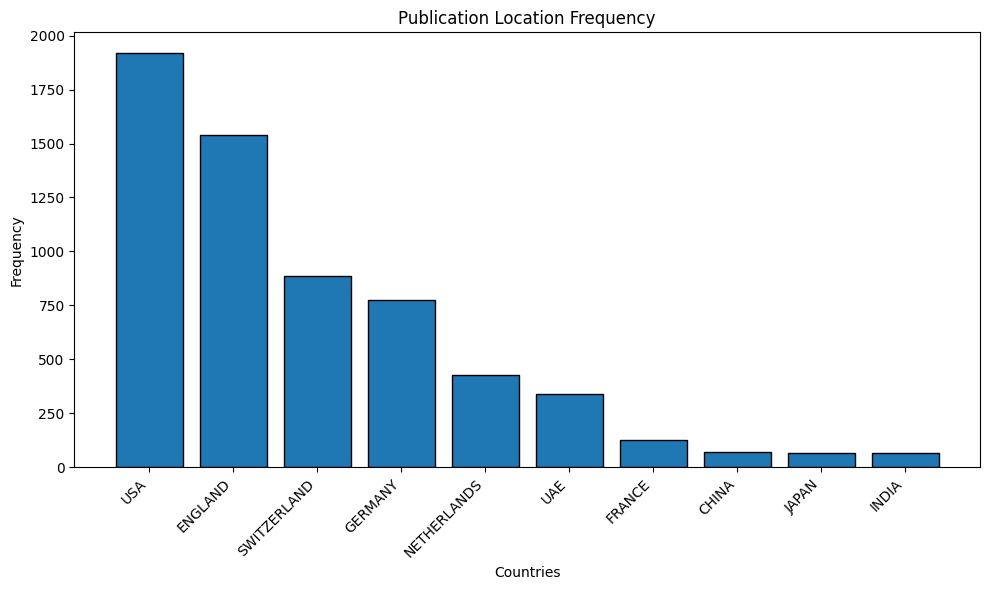

In [9]:
words, freqs = zip(*freq_countries)

plt.figure(figsize=(10, 6))  
plt.bar(words, freqs, edgecolor='k')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Publication Location Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()